# Setup

In [1]:
%matplotlib inline

import numpy as np
import scipy.signal as sig
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
import os
import h5py
import resin
import pandas as pd

from pandas import DataFrame,Series,read_table

General info

In [2]:
savePlots = True

saveAsPath = './Fig S3/'
if not os.path.exists(saveAsPath):
    os.mkdir(saveAsPath)
saveAsPath = './Fig 06/'
if not os.path.exists(saveAsPath):
    os.mkdir(saveAsPath)

saveAsName = 'Fig'

Info for plots

In [3]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("white")

figsize = (7,7)
axis_label_fontsize = 24

# Dot formatting
alpha_main = 0.2
alpha_darker = 0.3


# Line formatting
linewidth = 5
linealpha = .7
marker = 'o'
markersize = 10
err_capsize = 3
err_capthick = 3
elinewidth = 3

# Bar formatting
bar_linewidth = 4

# Colors for different moving averages
plot_colors = {'10s_MA': [.8, .8, .8],
               '1min_MA':[.5, .5, .5],
               '10min_MA': [.3, .3, .3]}

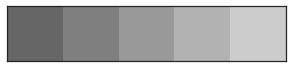

In [4]:
colors_birds = [np.repeat(.4, 3),
                np.repeat(.5, 3),
                np.repeat(.6, 3),
                np.repeat(.7, 3),
                np.repeat(.8, 3)]

legendMarkers_birds = []
for b in range(5):
    legendMarkers_birds.append(plt.Line2D([0],[0], color=colors_birds[b], marker='o', linestyle='')) 

sns.palplot(colors_birds)


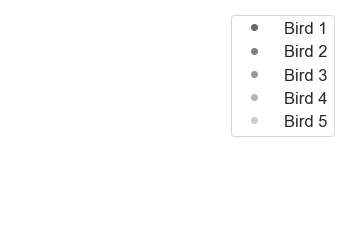

In [5]:
plt.legend(legendMarkers_birds, ['Bird 1', 'Bird 2', 'Bird 3', 'Bird 4', 'Bird 5'])
sns.despine(bottom=True, left=True)
plt.yticks([])
plt.xticks([])


if savePlots:
        plt.savefig(saveAsPath + saveAsName + "bird_color_legend.pdf")

# Load data on autocorrelation peaks

In [6]:
def plotFig(time_scale, dataPath_root, ylim_m=60, min_or_s='minutes'):

    if min_or_s == 'minutes':
        multiplier=60
    elif min_or_s == 'seconds':
        multiplier=1
    
    for variable in ['DeltaLog', 'GammaDeltaRatio', 'nPeaks']:
        var_means = []
        
        dataPath = dataPath_root + variable + '/'
        
        print(variable)
        col=1
        plt.figure(figsize=figsize)

        for file in np.sort(os.listdir(dataPath)): # this assumes filenames are in order of bird
            if file.endswith('.csv'):
                with open(dataPath+file) as opened_file:
                    data = read_table(opened_file, index_col=None,
                                      sep = ',', lineterminator='\n', header=0)

                    # Dots of measurements from each channel
                    plt.plot(np.repeat(col, len(data))+np.arange(-.1,.1,.2/len(data)),
                             data[time_scale], 
                             marker=marker, markersize=markersize,
                             color=plot_colors[time_scale],
                             alpha = linealpha/1.5, lw=0);
                    # Bar graph of mean
                    plt.bar(col, data[time_scale].mean(), width=1, color='none', edgecolor=plot_colors[time_scale], linewidth=bar_linewidth)
                    print(data[time_scale].mean()/multiplier)
                    
                    # save bird mean
                    var_means.append(data[time_scale].mean())

                    #plt.plot(col, data['10min_MA'].mean(), 'o', color='k')
                col += 1

        plt.title('Period of ' + variable +' using '+ time_scale, fontsize=axis_label_fontsize)
        plt.xlim((.3, 5.8));
        plt.xticks(np.arange(1,6), ['Bird 1', 'Bird 2', 'Bird 3', 'Bird 4', 'Bird 5']);
        
            
        plt.yticks(np.arange(0, 60*ylim_m + 1, .25*60*ylim_m),
                   np.arange(0,ylim_m + 1/60, .25*ylim_m))
        plt.ylim
        plt.ylabel('minutes', fontsize=axis_label_fontsize)
        plt.axhline(np.mean(var_means), linestyle='--', color=plot_colors[time_scale])
        
        print('Mean of all birds:', np.round(np.mean(var_means)/multiplier, decimals=2), min_or_s,
              '+/-', np.round(np.std(var_means)/multiplier, decimals=2))

        if variable == 'GammaDeltaRatio':
            if savePlots:
                name = saveAsPath + saveAsName + '6c-d_' + variable + '_' + time_scale + 'summary'
                plt.savefig(name + '.pdf')

## Plot average periods

### 10 min window: FIGURE 6C

DeltaLog
16.494444444444444
33.72777777777778
33.7875
29.87222222222222
29.16111111111111
Mean of all birds: 28.61 minutes +/- 6.35
GammaDeltaRatio
24.680555555555554
27.70277777777778
33.49722222222222
33.67
23.74722222222222
Mean of all birds: 28.66 minutes +/- 4.23
nPeaks
17.82222222222222
28.836111111111112
33.480555555555554
17.85666666666667
17.683333333333334
Mean of all birds: 23.14 minutes +/- 6.71


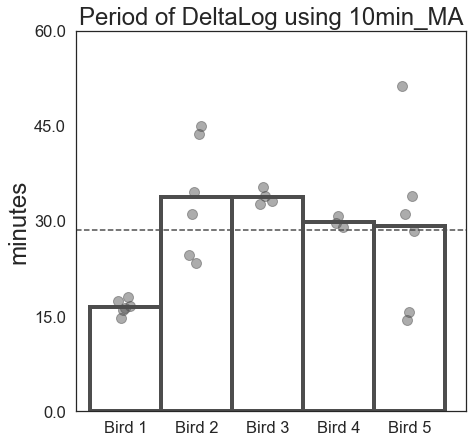

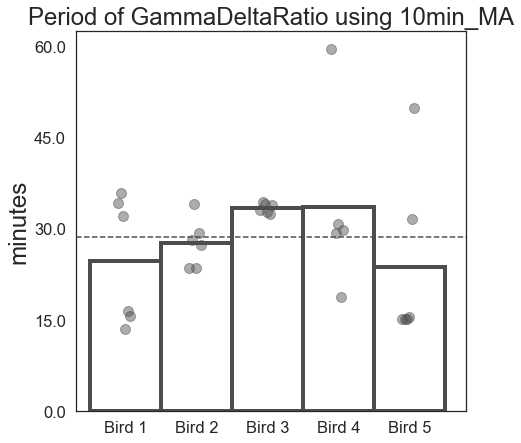

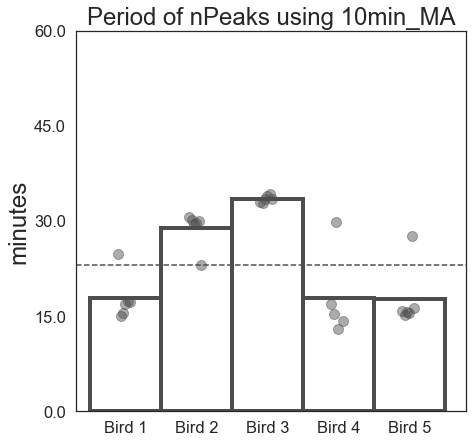

In [7]:
dataPath_root = saveAsPath + 'Fig6_data/'

ylim_m = 60
time_scale = '10min_MA'
plotFig(time_scale, dataPath_root, ylim_m=ylim_m)

#### FIGURE S3B: check for correlation with REM %

In [8]:
# nighttime REM as % of TST
rem = 100*np.array([0.475197408,
0.364199961,
0.184704423,
0.230851895,
0.27896679])

In [9]:
# Period of slow rhythm
pd = [24.680555555555554,
27.70277777777778,
33.49722222222222,
33.67,
23.74722222222222]

In [10]:
slope, intercept, r_value, p_value, std_err = stat.linregress(pd, rem)
print('slope =', slope, ', r2 =', r_value**2, ', p =', p_value)

slope = -1.744601839360582 , r2 = 0.5123288373217029 , p = 0.17393731770943488


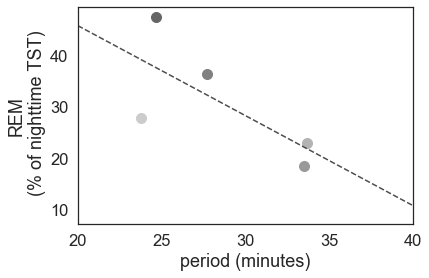

In [11]:
for bird in range(5):
    plt.plot(pd[bird], rem[bird], 'o', markersize=10, color=colors_birds[bird])

# plot fitted line
x = np.arange(20, 42)
y = slope*x + intercept
plt.plot(x, y,'--', color=plot_colors[time_scale])
plt.xlim(20,40)
plt.ylabel('REM\n (% of nighttime TST)')
plt.xlabel('period (minutes)')

if savePlots:
    name = './Fig S3/' + saveAsName +  'S3b_correlation_gammadelta_' + time_scale
    plt.savefig(name + '.pdf')

### 1 min window

DeltaLog
12.15
5.766666666666667
7.486111111111112
5.952777777777778
7.586111111111111
Mean of all birds: 7.79 minutes +/- 2.31
GammaDeltaRatio
6.091666666666667
6.083333333333333
12.358333333333333
6.786111111111111
7.738888888888889
Mean of all birds: 7.81 minutes +/- 2.35
nPeaks
6.747222222222222
9.55
11.402777777777777
13.21388888888889
7.894444444444445
Mean of all birds: 9.76 minutes +/- 2.33


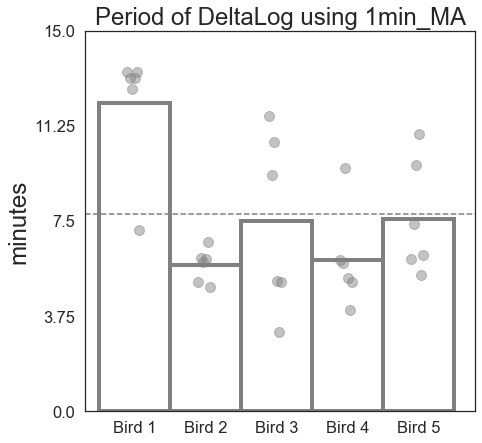

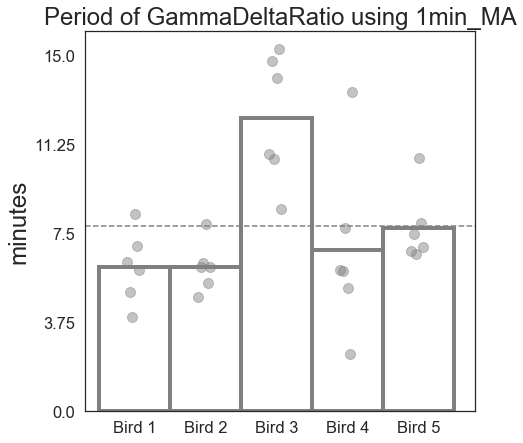

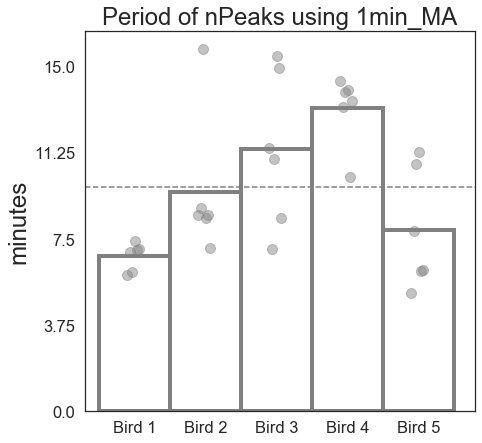

In [12]:
time_scale = '1min_MA'
ylim_m = 15
plotFig(time_scale, dataPath_root, ylim_m=ylim_m)

#### check for correlation with REM %

In [13]:
# nighttime REM as % of TST
rem = 100*np.array([0.475197408,
0.364199961,
0.184704423,
0.230851895,
0.27896679])

In [14]:
# Period of 1-min MA
pd = [6.091666666666667,
6.083333333333333,
12.358333333333333,
6.786111111111111,
7.738888888888889]

In [15]:
slope, intercept, r_value, p_value, std_err = stat.linregress(pd, rem)
print('slope =', slope, ', r2 =', r_value**2, ', p =', p_value)

slope = -3.122204488488927 , r2 = 0.5080321691192132 , p = 0.17661753082922266


Text(0.5, 0, '1-min MA pd (minutes)')

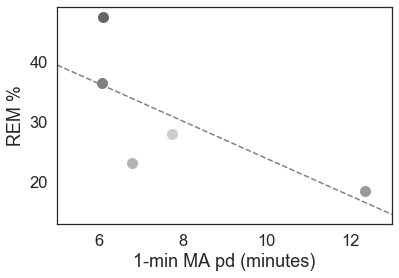

In [16]:
for bird in range(5):
    plt.plot(pd[bird], rem[bird], 'o', markersize=10, color=colors_birds[bird])

# plot fitted line
x = np.arange(5, 14)
y = slope*x + intercept
plt.plot(x, y,'--', color=plot_colors[time_scale])
plt.xlim(5, 13)
plt.ylabel('REM %')
plt.xlabel('1-min MA pd (minutes)')

### 10 s window: FIGURE 6D

DeltaLog
161.66666666666666
54.5
81.0
52.5
145.66666666666666
Mean of all birds: 99.07 seconds +/- 45.98
GammaDeltaRatio
78.66666666666667
72.5
40.666666666666664
52.5
57.5
Mean of all birds: 60.37 seconds +/- 13.71
nPeaks
91.5
253.5
140.66666666666666
108.5
167.66666666666666
Mean of all birds: 152.37 seconds +/- 56.97


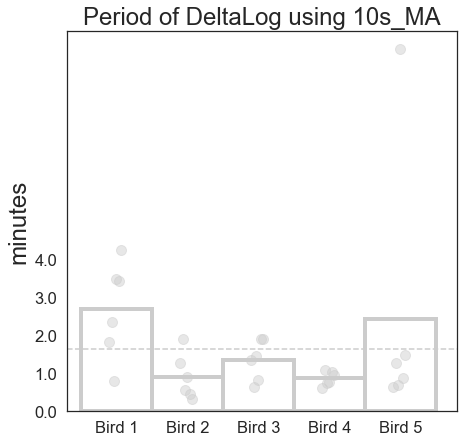

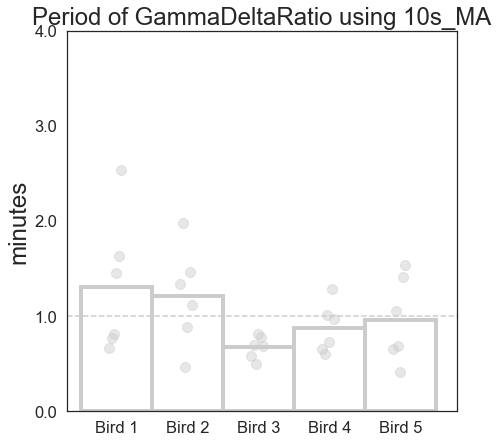

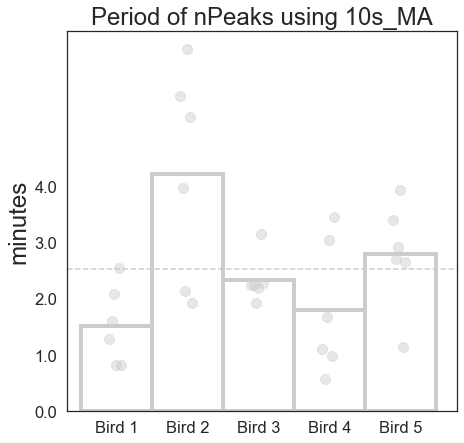

In [17]:
time_scale = '10s_MA'
ylim_m = 4
plotFig(time_scale, dataPath_root, ylim_m=ylim_m, min_or_s='seconds')

#### FIGURE S3A: check for correlation with REM %

In [18]:
# nighttime REM as % of TST
rem = 100*np.array([0.475197408,
0.364199961,
0.184704423,
0.230851895,
0.27896679])

In [19]:
# Period of fast rhythm
pd = [78.66666666666667,
72.5,
40.666666666666664,
52.5,
57.5]

In [20]:
slope, intercept, r_value, p_value, std_err = stat.linregress(pd, rem)
print('slope =', slope, ', r2 =', r_value**2, ', p =', p_value)

slope = 0.7296240832464815 , r2 = 0.9426472159473888 , p = 0.005932856643018482


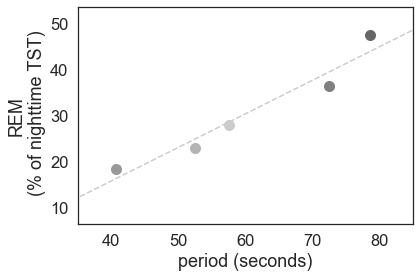

In [21]:
for bird in range(5):
    plt.plot(pd[bird], rem[bird], 'o', markersize=10, color=colors_birds[bird])

# plot fitted line
x = np.arange(30, 90)
y = slope*x + intercept
plt.plot(x, y,'--', color=plot_colors[time_scale])
plt.xlim(35, 85)
plt.ylabel('REM\n (% of nighttime TST)')
plt.xlabel('period (seconds)')
if savePlots:
    name = './Fig S3/' + saveAsName +  'S3a_correlation_gammadelta_' + time_scale
    plt.savefig(name + '.pdf')